# 財務分析第一回
https://wineytrade.com/python_zaimubunseki_01/

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

In [3]:
financial_data = pd.read_csv("financial_3064.csv", encoding="SHIFT-JIS")

financial_data.head()

,売上高,売上原価,売上総利益,売上総利益率,販管費,営業利益,営業利益率,EBITDA,経常利益,法人税等,...,投資CF,財務CF,フリーCF,設備投資額,研究開発費,発行済株式総数,従業員数,売上/従業員数,営利/従業員数,株価
0,131463000000,94367000000,37095000000,28.2,21256000000,15839000000,12.0,17234000000,15887000000,4816000000,...,-3765000000,-6562000000,11480000000,-,-,248422212,572,229830419,27690559,2923
1,109553023000,77525768000,32027255000,29.2,18236593000,13790661000,12.6,15002704000,13788653000,4400293000,...,-1467137000,-5673782000,11591338000,-,-,248347948,480,228235464,28730543,2718
2,88347986000,61418845000,26929140000,30.5,15091418000,11837722000,13.4,12902332000,11858172000,3475960000,...,-3284825000,-1379969000,9898071000,-,-,248286334,377,234344790,31399793,1800


In [7]:
net_assets = financial_data["純資産"]
net_assets_shift = net_assets.shift(-1)
growth_rate = (net_assets - net_assets_shift) / net_assets_shift * 100
gr_dropna = growth_rate.dropna()
gr_dropna

0    25.718558
1    28.519839
Name: 純資産, dtype: float64

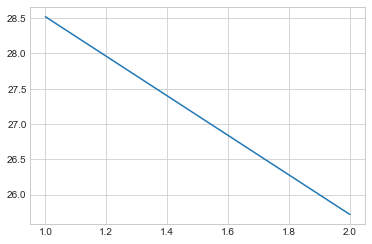

In [16]:
# 純資産を時系列で見る
left = np.array([2, 1])
plt.plot(left, gr_dropna)

In [18]:
# 加重平均
sum_ = 0
cnt = 0

for year in reversed(gr_dropna):
    cnt+=1
    # 年度ごとに重みをつける
    weight = year * cnt
    sum_+=weight

# 加重平均
result = sum_ / (cnt * (cnt + 1) / 2) # 分母は等差数列の和
result

26.65231798197642

In [20]:
# 売上と株価の相関
corr = financial_data[["売上高", "株価"]]
corr.corr()

,売上高,株価
売上高,1.000000,0.935617
株価,0.935617,1.000000


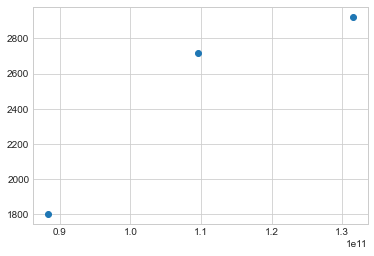

In [21]:
# 売上と株価の散布図
x = financial_data["売上高"]
y = financial_data["株価"]

plt.scatter(x, y)